In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("data/crop_production.csv")
df.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df.columns


Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
df.isnull().sum()


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

## Initial Data Exploration

This notebook loads and explores the crop production dataset.
Basic inspection is performed to understand structure, columns, and missing values.


In [7]:
df.isnull().sum()


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df = df.dropna(subset=["Production"])


In [9]:
df["Area"] = df["Area"].fillna(df["Area"].median())


In [10]:
df.dtypes


State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [11]:
df["Crop_Year"] = df["Crop_Year"].astype(int)
df["Production"] = pd.to_numeric(df["Production"], errors="coerce")


In [12]:
df = df.drop_duplicates()


## Data Cleaning & Preparation

- Removed rows with missing production values
- Filled missing area values using median
- Converted year column to integer
- Removed duplicate records

The dataset is now clean and ready for analysis.


In [13]:
df.describe()


,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [14]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


<Figure size 1000x600 with 0 Axes>

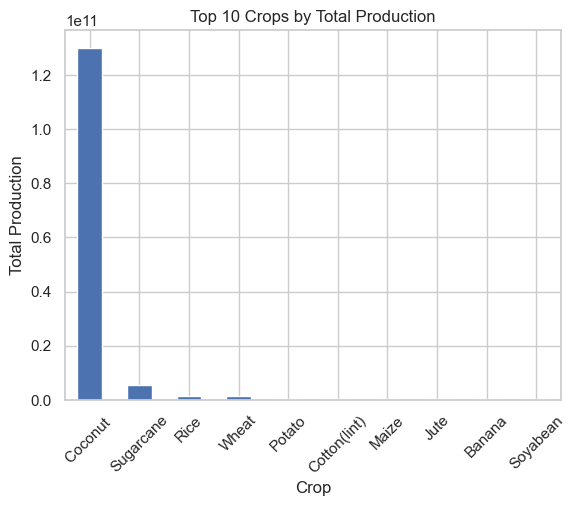

In [15]:
top_crops = (
    df.groupby("Crop")["Production"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_crops.plot(kind="bar")
plt.title("Top 10 Crops by Total Production")
plt.xlabel("Crop")
plt.ylabel("Total Production")
plt.xticks(rotation=45)
plt.show()


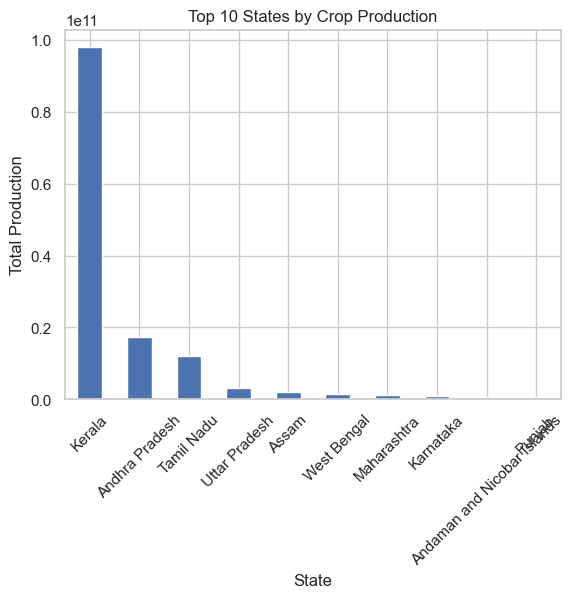

In [16]:
top_states = (
    df.groupby("State_Name")["Production"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_states.plot(kind="bar")
plt.title("Top 10 States by Crop Production")
plt.xlabel("State")
plt.ylabel("Total Production")
plt.xticks(rotation=45)
plt.show()


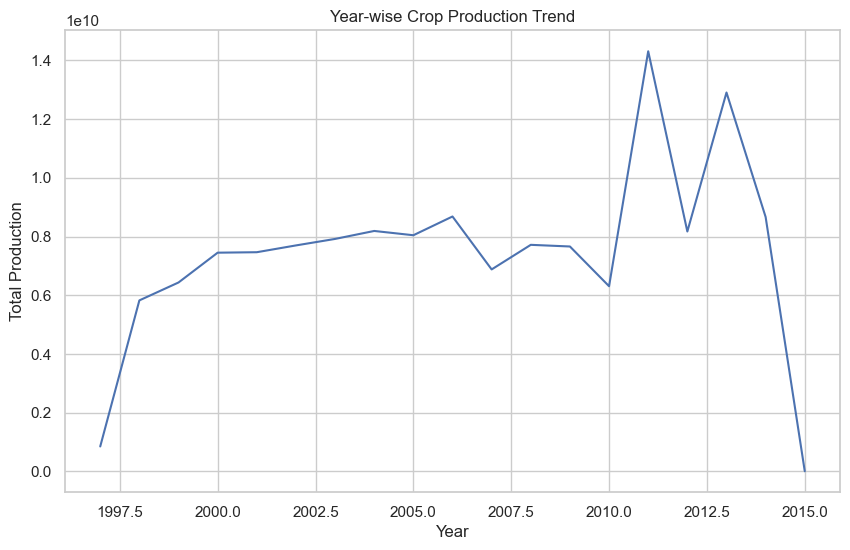

In [17]:
yearly_trend = (
    df.groupby("Crop_Year", as_index=False)["Production"]
    .sum()
    .sort_values("Crop_Year")
)

plt.figure(figsize=(10, 6))
plt.plot(yearly_trend["Crop_Year"], yearly_trend["Production"])
plt.title("Year-wise Crop Production Trend")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.show()


## Key Insights from Visualization

- A small number of crops contribute to the majority of total production.
- Certain states dominate crop production, indicating regional specialization.
- Seasonal patterns strongly influence production output.
- Overall production shows a long-term increasing trend with fluctuations.

These insights can help policymakers and farmers make informed decisions.


In [19]:
# Target variable
y = df["Production"]

# Feature columns
X = df.drop(columns=["Production"])


In [20]:
X = pd.get_dummies(X, drop_first=True)



In [21]:
X.shape, y.shape


((242361, 807), (242361,))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Machine Learning Preparation

- Selected production as target variable
- Encoded categorical features using one-hot encoding
- Split dataset into training and testing sets
- Applied feature scaling for better model performance

The dataset is now ready for training ML models.
